Ce document contient une implémentation des descripteurs de couleurs.

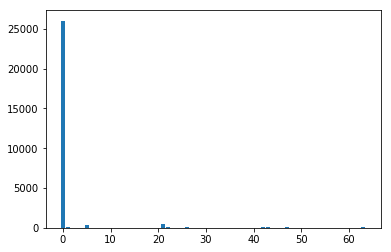

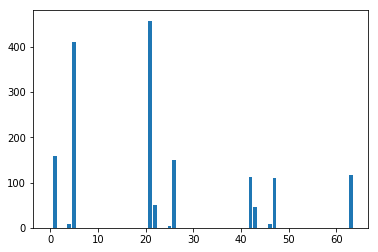

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

from Visualisation import read_image
from color_histogram import color_histogram, histogram_filter

if __name__ == '__main__':
    X=read_image(300,0)
    hist=color_histogram(X,'rgb',[4,4,4])
    plt.figure()
    plt.bar(np.arange(hist.shape[0]),hist)
    hist=histogram_filter(hist)
    plt.figure()
    plt.bar(np.arange(hist.shape[0]),hist)
    plt.show()
    